<img src=https://www.udc.es/export/sites/udc/silazarillo/_galeria_imgs/03_Simbolo_logo_cor.png_2063069294.png width="300" align="left">
<br />

# Aprendizaje automático II
#### <font color=green>*Máster en Informática Industrial y Robótica*</font>

# Tema 2: Agrupamiento (clustering)

#### Ejercicio sobre el uso de algoritmos de agrupamiento ($k$-medias y DBSCAN) sobre los siguientes conjuntos de datos:
#### 1. Conjunto de datos artificial de 2 dimensiones con 3 grupos (clústeres).
#### 2. Conjunto de datos artificial de 32 dimensiones con 16 grupos (clústeres).

#### Se cargan las librerías necesarias:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Config
from function import *               #funciones creadas por el usuario para mejorar la legibilidad del codigo.

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage , fcluster
from scipy.spatial.distance import pdist


### Caso 1: Conjunto de datos artificial de 2 dimensiones con 3 grupos (clústeres).

#### Se generan 200 datos artificiales en 2 dimensiones empleando la función [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) de la librería scikit-learn. Para ello se generarán datos con distribuciones Gaussians isotrópicas con 3 centros diferentes y desviación típica de 0.5:

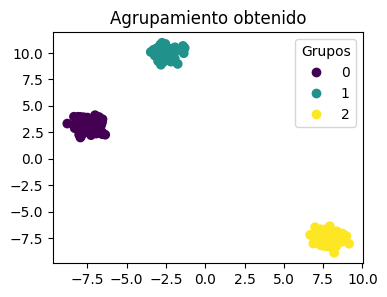

In [2]:
centers = [[-7.5, 3], [-2.5, 10], [8, -7.5]]    #Definicion de los vertices de los 3 centroides
X, labels_true = make_blobs(n_samples=200,      #cantidad de datos a generar 
                            n_features=2,       #numero de dimensiones
                            centers=centers,    #cant y coordenadas de los centroides
                            cluster_std=0.5,    #desviacion tipica de los datos 
                            random_state=0)  

plot_clusters(X, labels_true, params = Config.params)   #funcion creada para crear los graficos (function.py y Config.py)

#### Se realiza el agrupamiento (clustering) mediante el uso del método [$k$-medias](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Para determinar el mejor valor de $k$ se probará con valores entre 1 y 15 y se guardará en una lista la medida de inercia de cada uno de los modelos:

In [3]:
k_values = range(1, 15)
_ ,inertia_values , silhouette_scores = k_medias_func(X , k_values)

Para poder aplicar la puntuación de silueta debe de haber al menos dos cluster (k).


#### Se muestra gráficamente el valor de la inercia con los valores de $k$ entre 1 y 15 para poder determinar el mejor valor de $k$:

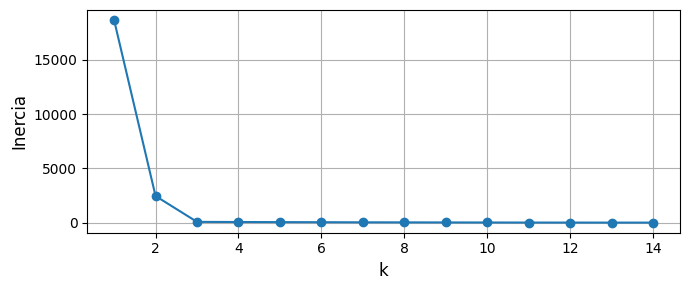

In [4]:
plot_figure(k_values ,inertia_values ,Config.params_inertial)

#### Se muestra gráficamente el resultado del agrupamiento para el mejor valor de $k$ observando la gráfica anterior. Para ello, se realizará de nuevo el entrenamiento del modelo para ese valor concreto de $k$. En la gráfica se mostrará también el centroide de cada grupo mediante el uso de punto en color rojo. Para crear la gráfica se recomienda el uso del método [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) y el método [legend_elements](https://matplotlib.org/stable/api/collections_api.html#matplotlib.collections.PathCollection.legend_elements) para definir los elementos de la leyenda:

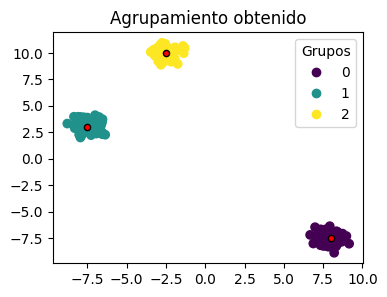

In [5]:
best_k = 3
best_kmeans , _ , __ = k_medias_func(X , [best_k])

plot_clusters(X , best_kmeans.labels_ ,centers=centers , params=Config.params)

#### Cálculo del coeficiente de silueta ([Silhouette Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)). Para determinar el mejor valor de $k$ se probará con valores entre 2 y 15 y se guardará en una lista el valor de coeficiente para cada uno de los modelos:

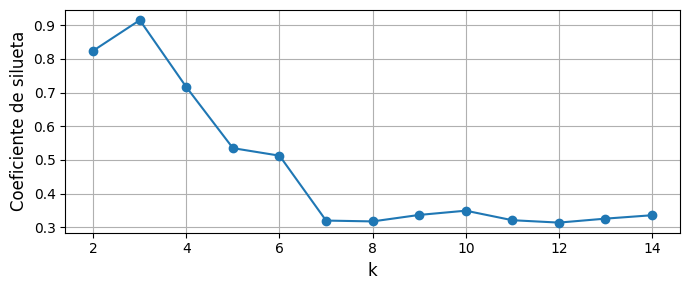

In [6]:
k_values_ = range(2, 15)  # Rango de valores de K
_ , inertia_values , silhouette_scores = k_medias_func(X , k_values_)    
plot_figure(k_values_ , silhouette_scores , Config.params_silhouette)

#### Se realiza el agrupamiento (clustering) mediante el uso del método [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Para determinar el mejor valor de $epsilon$ se calculará la $k$-distancia de cada punto, siendo $k$ = minPts, y se mostrarán gráficamente las $k$-distancias ordenadas de menor a mayor. Para poder determinar la $k$-distancia se recomienda el uso de la función [NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) y para ordenarlas la función [sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html):

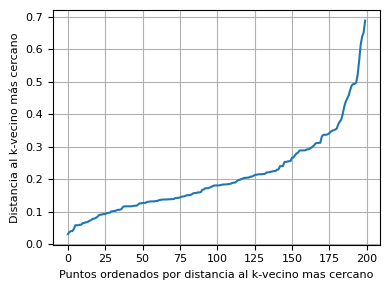

In [7]:
nbrs = NearestNeighbors(n_neighbors=best_k).fit(X)
distances, _ = nbrs.kneighbors(X)
k_distances = np.sort(distances[:, -1])  # k-distancias ordenadas
x = np.arange(len(k_distances))
plot_figure(x , k_distances, Config.params_nh)

#### Se muestra gráficamente el resultado de agrupamiento con DBSCAN para el mejor valor estimado de minPts y $epsilon$. Se indicará también el número de grupos (clústeres) creados y el número de datos clasificados como ruido:

Grupos detectados : 3
Datos clasificados como ruido 0


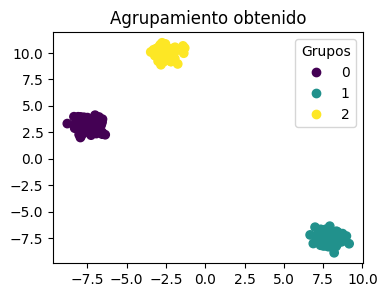

In [8]:
epsilon = 0.7
min_samples = 4
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(X)

plot_clusters(X ,labels ,params=Config.params)
num_grupos, num_ruido = count_labels(labels)

print("Grupos detectados : {}".format(num_grupos))
print("Datos clasificados como ruido {}".format(num_ruido))

#### Se realiza el agrupamiento (clustering) con el método jerárquico mediante el uso de la función [linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html). Para ello, es necesario calcular previamente la matriz de distancias de los datos usando, por ejemplo, la función [pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html):

In [9]:
distances = pdist(X, metric='euclidean')
Z = linkage(distances, method='centroid')

#### Se muestra el dendrograma asociado al método jerárquico con la función [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html):

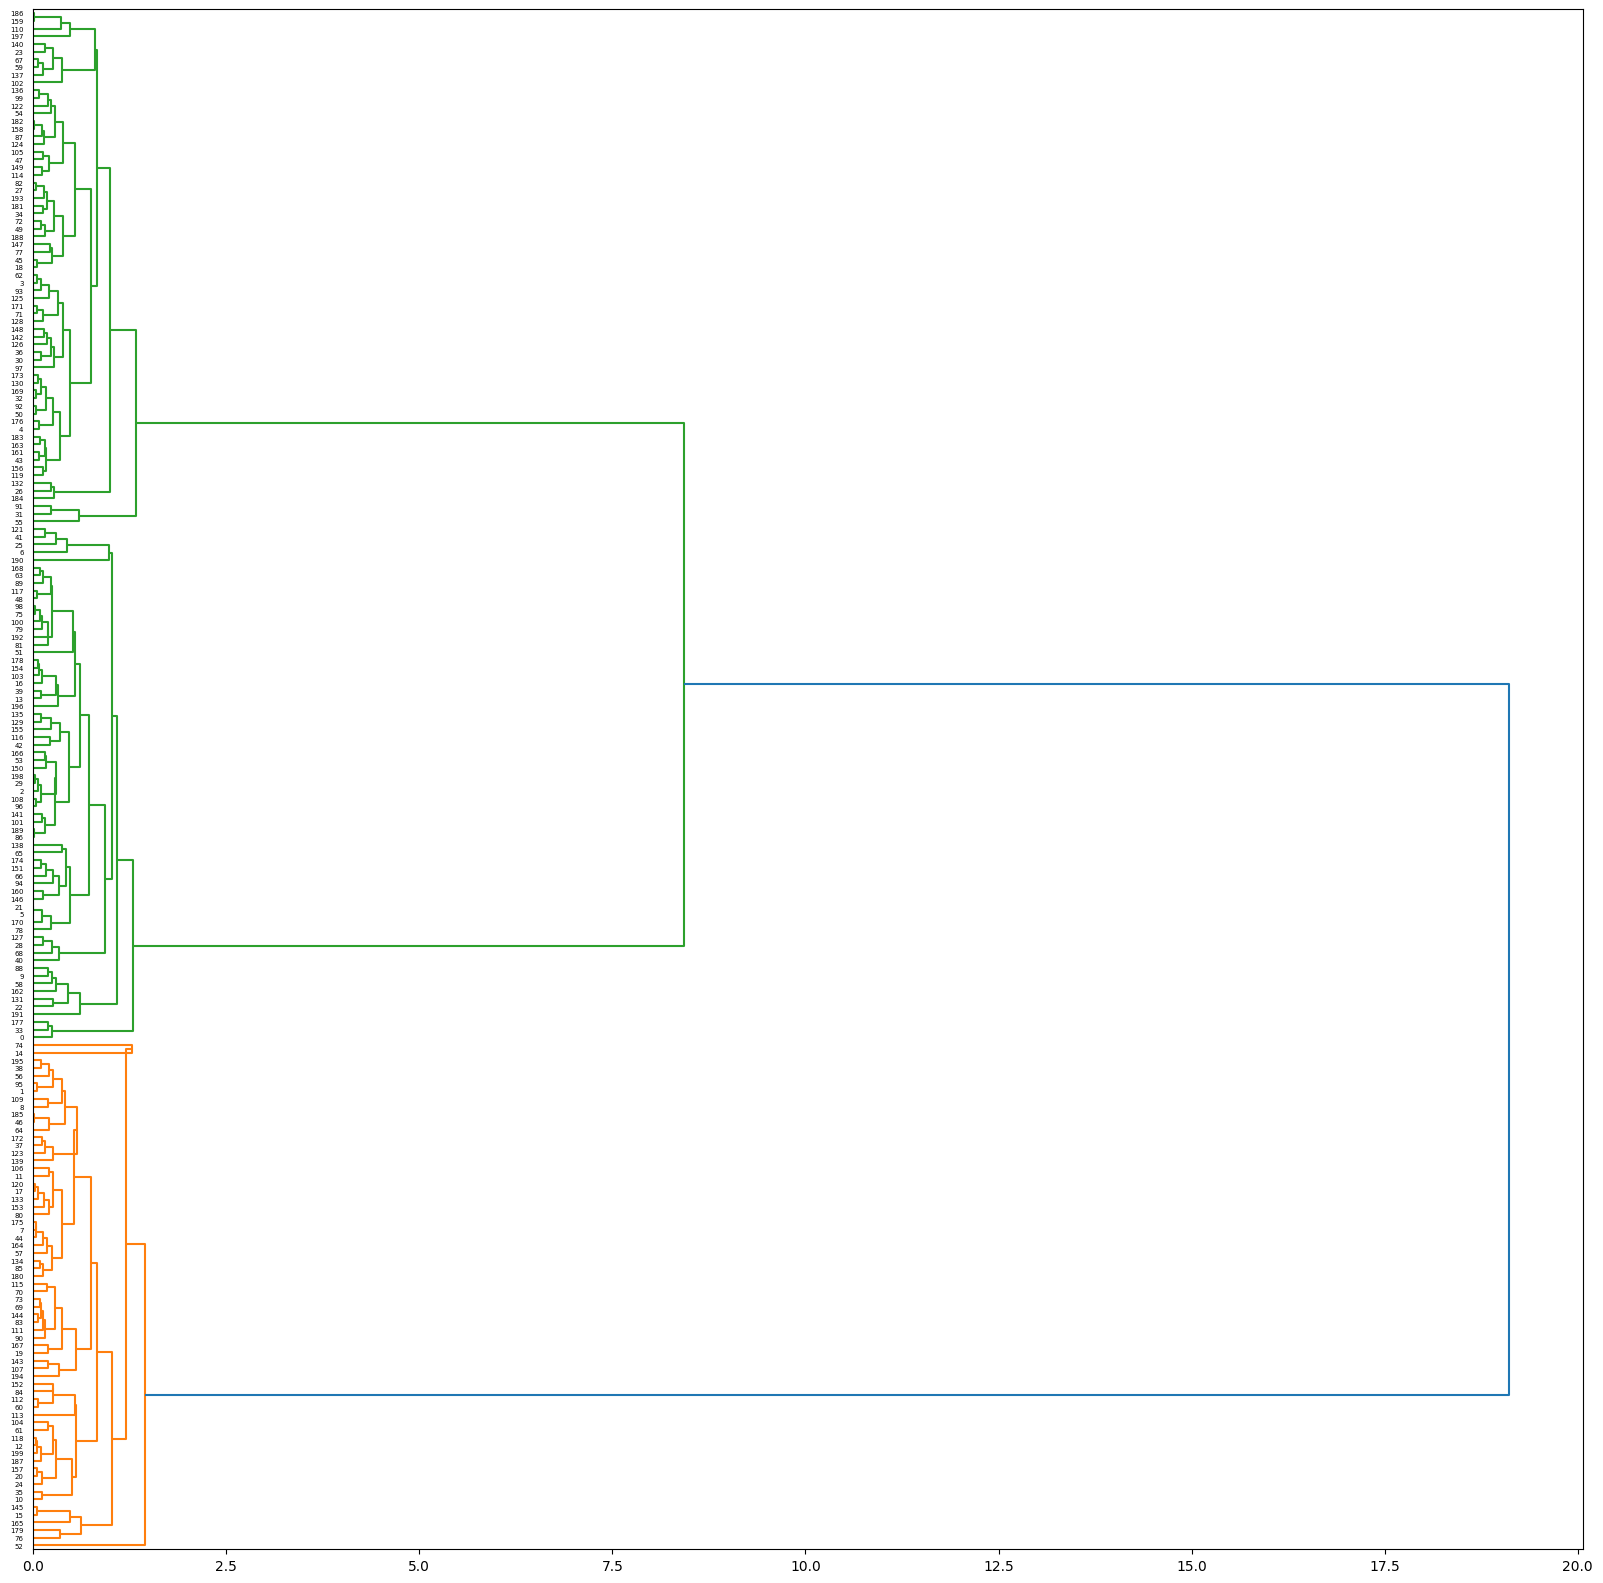

In [10]:
fig = plt.figure(figsize=(20, 20))
dn = dendrogram(Z , orientation='right')
plt.show()

#### Se muestra el resultado del agrupamiento jerárquico con la función [fcluster](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html). Emplear para ello el argumento criterion='maxclust' para seleccionar el número de grupos:

Grupos detectados : 3


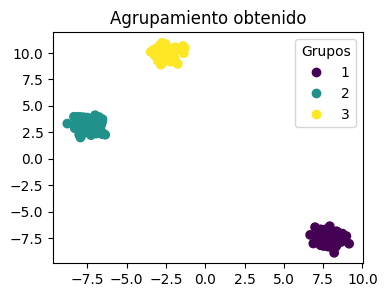

In [11]:
labels_fcluster = fcluster(Z, t=3, criterion='maxclust');   #t es la cantidad de cluster deseados

plot_clusters(X ,labels_fcluster , params=Config.params)
num_grupos_fcluster, _ = count_labels(labels_fcluster)

print("Grupos detectados : {}".format(num_grupos_fcluster))

### Caso 2: Conjunto de datos artificial de 32 dimensiones con 16 grupos (clústeres).

#### Se carga de fichero (dim032.txt) con el conjunto de datos procedente de la página web [Clustering basic benchmark](http://cs.joensuu.fi/sipu/datasets/). Se recomienda el uso de la función [loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) para la lectura de los datos:

In [12]:
data = np.loadtxt('dim032.txt')
print(f"Datos       : {data.shape[0]}")
print(f"Variables   : {data.shape[1]}")

Datos       : 1024
Variables   : 32


#### Se realiza el agrupamiento (clustering) mediante el uso del método [$k$-medias](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Para determinar el mejor valor de $k$ se probará con valores entre 2 y 30 y se guardarán en listas la medida de inercia y el valor del coeficiente de silueta ([Silhouette Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)) de cada uno de los modelos:

In [13]:
k_values_dim32 = range(2, 30)  # Rango de valores de K
_, inertia_values, silhouette_scores = k_medias_func(data , k_values_dim32)

#### Se muestra en una misma gráfica el valor de la inercia y del coeficiente de silueta, con los valores de $k$ entre 2 y 30, para poder determinar el mejor valor de $k$:

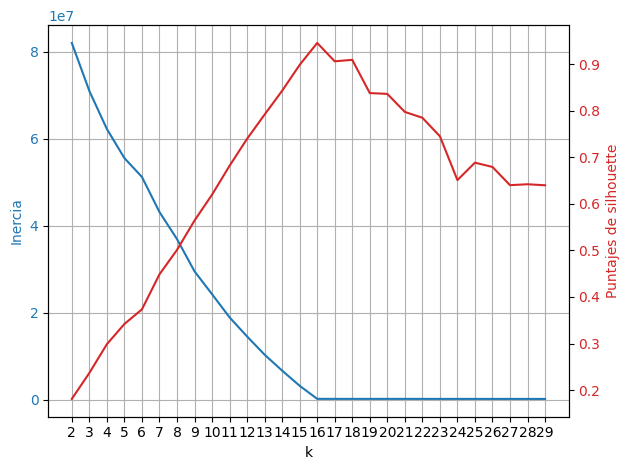

In [14]:
plot_two_figure(k_values_dim32 ,inertia_values , silhouette_scores)

#### Se realiza el agrupamiento (clustering) mediante el uso del método [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Para determinar el mejor valor de $epsilon$ se calculará la $k$-distancia de cada punto, siendo $k$ = minPts, y se mostrarán gráficamente las $k$-distancias ordenadas de menor a mayor. Para poder determinar la $k$-distancia se recomienda el uso de la función [NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) y para ordenarlas la función [sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html):

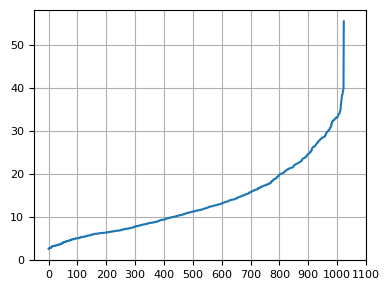

In [15]:
best_k_dim32 = 16
nbrs = NearestNeighbors(n_neighbors=best_k_dim32).fit(data)
distances, _ = nbrs.kneighbors(data)
k_distances = np.sort(distances[:, -1])  # k-distancias ordenadas

x = np.arange(len(k_distances))
plot_figure(x , k_distances , Config.params_nh_m32)

#### Se entrena el modelo con DBSCAN para el mejor valor estimado de minPts y $epsilon$. Se muestran el número de grupos (clústeres) creados y el número de datos clasificados como ruido:

In [16]:
epsilon = 54
min_samples = 64
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(data)

num_grup_dbscan, num_ruido_dbscan = count_labels(labels_dbscan)

print("Grupos detectados : {}".format(num_grup_dbscan))
print("Datos clasificados como ruido {}".format(num_ruido_dbscan))

Grupos detectados : 16
Datos clasificados como ruido 0


#### En este caso no podemos visualizar los resultados directamente ya que el espacio de los datos tiene 32 dimensiones. Por ello, transformaremos los datos empleando el método [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), que hemos estudiado en el tema de reducción de la dimensión, y seleccionaremos solo los 2 primeros componentes del espacio transformado. Con esos 2 componentes, mostremos gráficamente el agrupamiento realizado por el DBSCAN:

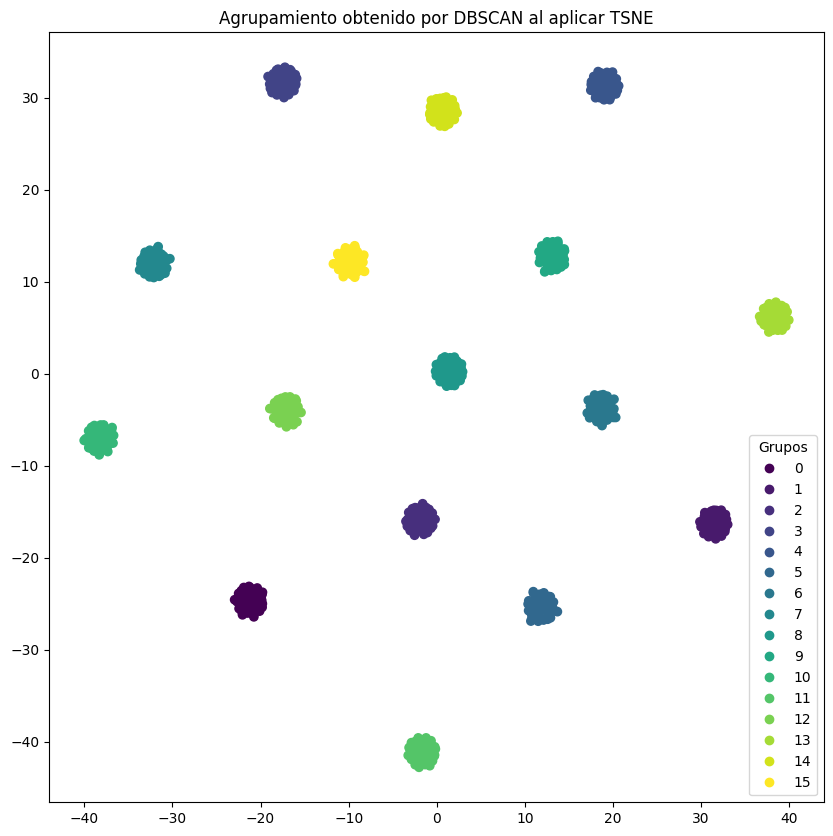

In [17]:
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(data)
plot_clusters(X_embedded , labels_dbscan , params=Config.params1)